# # **Prediction in Flight Delays by Aayushi 20BCE1791**

**importing libraries**

In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None) # To show all the columns in a dataframe

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

**Importing flights, airlines and airports datset**

In [2]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [2]:
flights = pd.read_csv('/kaggle/input/flight-delays/flights.csv', low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let's inspect the dataset:

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


What attributes have null values?

In [7]:
flights.isnull().any()

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

Let's print out the names of the attributes that have null values:

In [8]:
flights_na_cols = flights.columns[flights.isnull().any()]
flights_na_cols

Index(['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON',
       'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Let's create a new dataframe, flights_num, that contains the numerical attributes of flights only:

In [9]:
flights_num = flights.select_dtypes(include=['int64','float64'])

flights_num.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,98,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,2336,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,840,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,258,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,135,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


Let's also create a new dataframe, flights_str, that contains the remaining attributes:

In [10]:
flights_str = flights.select_dtypes(include='object')
flights_str.head()

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,AS,N407AS,ANC,SEA,NaN
1,AA,N3KUAA,LAX,PBI,NaN
2,US,N171US,SFO,CLT,NaN
3,AA,N3HYAA,LAX,MIA,NaN
4,AS,N527AS,SEA,ANC,NaN


Let's find how many null values there are in the flights_str dataframe:

In [11]:
flights_str.isna().sum()

AIRLINE                      0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
CANCELLATION_REASON    5729195
dtype: int64

We notice that the attribute CANCELLATION_REASON has 5,729,195 null values, which is about 98% of the total number of rows in the dataframe. We will remember to drop this column, which is rather useless, once we have joined the flights_srt dataframe back with the flights_num dataframe. 

For the moment, let's find the number of null values in each numerical column:

In [12]:
flights_num.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
FLIGHT_NUMBER                0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

We note that the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY and WEATHER_DELAY all have an identical number of null values (4,755,640), which may mean that for that many flights the reason for the delay was simply not recorded. We also note that this number is about 81% of the total number of data points. Although in the following we will replace the null values in these five columns with the median value in each column, we should remember to take the resulting values with a grain of salt as the proportion of null values in the original dataframe is so big. 

Let's filter the dataframe on the numerical columns that have null values and save the resulting dataframe as flights_na:

In [13]:
flights_num_na_cols = flights_num.columns[flights_num.isnull().any()]
flights_num_na = flights_num[flights_num_na_cols]
flights_num_na.head()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,404.0,4.0,408.0,-22.0,NaN,NaN,NaN,NaN,NaN
1,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,737.0,4.0,741.0,-9.0,NaN,NaN,NaN,NaN,NaN
2,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,800.0,11.0,811.0,5.0,NaN,NaN,NaN,NaN,NaN
3,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,748.0,8.0,756.0,-9.0,NaN,NaN,NaN,NaN,NaN
4,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,254.0,5.0,259.0,-21.0,NaN,NaN,NaN,NaN,NaN


We also want to filter the numerical columns that do not have null values and save the resulting dataframe as flights_num_notnull:

In [14]:
flights_num_notnull_cols = flights_num.columns[flights_num.notnull().all()]
flights_num_notnull = flights_num[flights_num_notnull_cols]
flights_num_notnull.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,2015,1,1,4,98,5,1448,430,0,0
1,2015,1,1,4,2336,10,2330,750,0,0
2,2015,1,1,4,840,20,2296,806,0,0
3,2015,1,1,4,258,20,2342,805,0,0
4,2015,1,1,4,135,25,1448,320,0,0


Let's fill in the null values in the numerical columns, i.e. in the flights_num_na dataframe, with the median of each respective column. We'll do that using the SimpleImputer class from sklearn:

In [15]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class:
imputer = SimpleImputer(strategy = 'median')

In [16]:
# Fit the imputer object on the flights_na dataframe 
imputer.fit(flights_num_na)

# Calculate the imputer statistics: the result is a list
# whose entries are the median of each column
imputer.statistics_

array([1330.,   -2.,   14., 1343.,  123.,  118.,   94., 1509.,    6.,
       1512.,   -5.,    2.,    0.,    2.,    3.,    0.])

Check that the above values are the same as the manually calculated median on each column:

In [17]:
flights_num_na.median().values

array([1330.,   -2.,   14., 1343.,  123.,  118.,   94., 1509.,    6.,
       1512.,   -5.,    2.,    0.,    2.,    3.,    0.])

Now, fill the null values in flights_num_na using the imputer object and call flight_num_na_tr the resulting dataframe:

In [18]:
# X is a numpy array
X = imputer.transform(flights_num_na)

# Create the transformed dataframe flights_num_na_tr using the column names from flights_num_na.columns
# and matching the index with the one from flights.index.values
flights_num_na_tr = pd.DataFrame(X, columns = flights_num_na.columns, index = list(flights.index.values))

# Display the head of flights_num_na_tr
flights_num_na_tr.head()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,404.0,4.0,408.0,-22.0,2.0,0.0,2.0,3.0,0.0
1,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,737.0,4.0,741.0,-9.0,2.0,0.0,2.0,3.0,0.0
2,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,800.0,11.0,811.0,5.0,2.0,0.0,2.0,3.0,0.0
3,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,748.0,8.0,756.0,-9.0,2.0,0.0,2.0,3.0,0.0
4,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,254.0,5.0,259.0,-21.0,2.0,0.0,2.0,3.0,0.0


Join flights_num_na_tr to the flights_num_notnull dataframe using indexes, calling flights_num_tr the resulting dataframe:

In [19]:
flights_num_tr = flights_num_na_tr.join(flights_num_notnull)
flights_num_tr.head()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,404.0,4.0,408.0,-22.0,2.0,0.0,2.0,3.0,0.0,2015,1,1,4,98,5,1448,430,0,0
1,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,737.0,4.0,741.0,-9.0,2.0,0.0,2.0,3.0,0.0,2015,1,1,4,2336,10,2330,750,0,0
2,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,800.0,11.0,811.0,5.0,2.0,0.0,2.0,3.0,0.0,2015,1,1,4,840,20,2296,806,0,0
3,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,748.0,8.0,756.0,-9.0,2.0,0.0,2.0,3.0,0.0,2015,1,1,4,258,20,2342,805,0,0
4,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,254.0,5.0,259.0,-21.0,2.0,0.0,2.0,3.0,0.0,2015,1,1,4,135,25,1448,320,0,0


We now join the dataframes flights_num_tr and flights_str to form a new dataframe called flights_tr:

In [20]:
flights_tr = flights_num_tr.join(flights_str)

# Rearrange the order of columns
flights_tr = flights_tr[flights.columns]

flights_tr.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,2.0,0.0,2.0,3.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,2.0,0.0,2.0,3.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,2.0,0.0,2.0,3.0,0.0


Recall that we wanted to drop the CANCELLATION_REASON column:

In [21]:
flights_tr = flights_tr.drop(columns=['CANCELLATION_REASON'], axis = 1)
flights_tr.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0


We now want to rename the AIRLINE attribute as AIRLINE_CODE:

In [22]:
flights_tr = flights_tr.rename(columns = {'AIRLINE': 'AIRLINE_CODE'})
flights_tr.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0


# The airlines dataset

Let's also import the airlines dataset:

In [23]:
airlines = pd.read_csv('/kaggle/input/flight-delays/airlines.csv')
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


Let's rename the IATA_CODE column AIRLINE_CODE, and rename AIRLINE to be AIRLINE_NAME:

In [24]:
airlines = airlines.rename(columns={'IATA_CODE':'AIRLINE_CODE','AIRLINE':'AIRLINE_NAME'})
airlines.head(3)

,AIRLINE_CODE,AIRLINE_NAME
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


We now perform a "vlookup" operation by merging the flights_tr with the airlines dataframe so that the flights dataframe will contain the full airline name for each row, not just the airline code:

In [25]:
flights_airlines = pd.merge(flights_tr, airlines, on = 'AIRLINE_CODE', how='left')
flights_airlines.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.


Now we rename ORIGIN_AIRPORT as ORIGIN_AIRPORT_CODE, and DESTINATION_AIRPORT as DESTINATION_AIRPORT_CODE:

In [26]:
flights_airlines = flights_airlines.rename(columns={'ORIGIN_AIRPORT':'ORIGIN_AIRPORT_CODE', 
                                                    'DESTINATION_AIRPORT':'DESTINATION_AIRPORT_CODE'})
flights_airlines.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.


# The airports dataset

We finally import the airports dataset which contains information about every airport in the flights_airlines dataframe:

In [27]:
airports = pd.read_csv('/kaggle/input/flight-delays/airports.csv')
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


Let's rename the IATA_CODE as AIRPORT_CODE:

In [28]:
airports = airports.rename(columns = {'IATA_CODE':'AIRPORT_CODE'})
airports.head(3)

,AIRPORT_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


We now want to match the origin airport code in the flights_airlines dataframe with the airport code from the airports dataframe:

In [29]:
flights_airlines_airports = pd.merge(flights_airlines, airports, how='left', 
                                     left_on='ORIGIN_AIRPORT_CODE', right_on='AIRPORT_CODE')
flights_airlines_airports.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484


In the resulting dataframe, we will drop the AIRPORT_CODE column which is a duplicate of ORIGIN_AIRPORT_CODE and rename the following columns:

- AIRPORT as ORIGIN_AIRPORT:
- CITY as ORIGIN_CITY
- STATE as ORIGIN_STATE
- COUNTRY as ORIGIN_COUNTRY
- LATITUDE as ORIGIN_LATITUDE
- LONGITUDE as ORIGIN_LONGITUDE

In [30]:
flights_airlines_airports = flights_airlines_airports.drop(columns=['AIRPORT_CODE'])
flights_airlines_airports = flights_airlines_airports.rename(columns={'AIRPORT':'ORIGIN_AIRPORT',
                                                                     'CITY':'ORIGIN_CITY',
                                                                     'STATE':'ORIGIN_STATE',
                                                                     'COUNTRY':'ORIGIN_COUNTRY',
                                                                     'LATITUDE':'ORIGIN_LATITUDE',
                                                                     'LONGITUDE':'ORIGIN_LONGITUDE'})
flights_airlines_airports.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484


We now want to match the destination airport code in the flights_airlines dataframe with the airport code from the airports dataframe. We will call the resulting dataframe FAA (for flights_airlines_airports):

In [31]:
FAA = pd.merge(flights_airlines_airports, airports, how='left', 
                left_on='DESTINATION_AIRPORT_CODE', right_on='AIRPORT_CODE')
FAA.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,AIRPORT_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313


In the resulting dataframe, we will drop the AIRPORT_CODE column which is a duplicate of DESTINATION_AIRPORT_CODE and rename the following columns:

- AIRPORT as DESTINATION_AIRPORT:
- CITY as DESTINATION_CITY
- STATE as DESTINATION_STATE
- COUNTRY as DESTINATION_COUNTRY
- LATITUDE as DESTINATION_LATITUDE
- LONGITUDE as DESTINATION_LONGITUDE

In [32]:
FAA = FAA.drop(columns=['AIRPORT_CODE'])
FAA = FAA.rename(columns={'AIRPORT':'DESTINATION_AIRPORT',
                        'CITY':'DESTINATION_CITY',
                        'STATE':'DESTINATION_STATE',
                        'COUNTRY':'DESTINATION_COUNTRY',
                        'LATITUDE':'DESTINATION_LATITUDE',
                        'LONGITUDE':'DESTINATION_LONGITUDE'})
FAA.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313


**ANALYSIS**

**The top 5 origin and destination airports for the total number of flights in 2015**

In [33]:
top_5_origin_airports = FAA['ORIGIN_AIRPORT'].value_counts()[0:5]
print('The top 5 origin airports in 2015 were:\n')
print(top_5_origin_airports)

The top 5 origin airports in 2015 were:

Hartsfield-Jackson Atlanta International Airport    346836
Chicago O'Hare International Airport                285884
Dallas/Fort Worth International Airport             239551
Denver International Airport                        196055
Los Angeles International Airport                   194673
Name: ORIGIN_AIRPORT, dtype: int64


In [34]:
top_5_dest_airports = FAA['DESTINATION_AIRPORT'].value_counts()[0:5]
print('The top 5 destination airports in 2015 were:\n')
print(top_5_dest_airports)

The top 5 destination airports in 2015 were:

Hartsfield-Jackson Atlanta International Airport    346904
Chicago O'Hare International Airport                285906
Dallas/Fort Worth International Airport             239582
Denver International Airport                        196010
Los Angeles International Airport                   194696
Name: DESTINATION_AIRPORT, dtype: int64


**The top 5 origin airports for the number of cancelled flights in 2015**

In [35]:
top_5_airports_cancel = FAA.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum().sort_values(ascending=False)[0:5]
print('The top 5 origin airports for the number of cancelled flights in 2015 were:\n')
print(top_5_airports_cancel)

The top 5 origin airports for the number of cancelled flights in 2015 were:

ORIGIN_AIRPORT
Chicago O'Hare International Airport                8548
Dallas/Fort Worth International Airport             6254
LaGuardia Airport (Marine Air Terminal)             4531
Newark Liberty International Airport                3110
Gen. Edward Lawrence Logan International Airport    2654
Name: CANCELLED, dtype: int64


**What were the top 5 origin airports for the percentage of cancelled flights in 2015**

In [36]:
cancelled_flights_per_airport = FAA.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum()
cancelled_flights_per_airport = pd.DataFrame(cancelled_flights_per_airport)
cancelled_flights_per_airport.head(3)

,CANCELLED
ORIGIN_AIRPORT,
Aberdeen Regional Airport,8
Abilene Regional Airport,97
Abraham Lincoln Capital Airport,65


Then we find the total number of flights for each airport:

In [37]:
flights_per_airport = FAA.groupby('ORIGIN_AIRPORT')['FLIGHT_NUMBER'].count()
flights_per_airport = pd.DataFrame(flights_per_airport).rename(columns={'FLIGHT_NUMBER':'TOTAL_FLIGHTS'})
flights_per_airport.head(3)

,TOTAL_FLIGHTS
ORIGIN_AIRPORT,
Aberdeen Regional Airport,671
Abilene Regional Airport,2329
Abraham Lincoln Capital Airport,1587


Now merge the two dataframes:

In [38]:
df = pd.merge(cancelled_flights_per_airport, flights_per_airport, on = 'ORIGIN_AIRPORT', how='left')
df.head()

,CANCELLED,TOTAL_FLIGHTS
ORIGIN_AIRPORT,,
Aberdeen Regional Airport,8,671
Abilene Regional Airport,97,2329
Abraham Lincoln Capital Airport,65,1587
Adak Airport,7,96
Akron-Canton Regional Airport,100,6100


Finally, find the percentage of cancelled flights at each airport and sort values in descending order:

In [39]:
top5 = 100 *( df['CANCELLED']/df['TOTAL_FLIGHTS'] )
top5.sort_values(ascending=False)
top5 = pd.DataFrame(top5, columns = ['Percentage of cancelled flights'])
top5.sort_values(by = 'Percentage of cancelled flights', ascending=False)[0:5]

,Percentage of cancelled flights
ORIGIN_AIRPORT,
Ithaca Tompkins Regional Airport,11.764706
Mammoth Yosemite Airport,10.256410
Friedman Memorial Airport,9.205021
Devils Lake Regional Airport,8.761905
Del Norte County Airport (Jack McNamara Field),8.421053


**Findings**
- The top airports for percentage of cancelled flights are small regional airports, which are not very busy like the big airports. It therefore makes sense that a higher percentage of flights are being cancelled at these small airports if there aren't enough customers to fill the airplanes.
- The top airports for percentage of cancelled flights are very different from the top airports for the number of cancelled flights.

**How many flights were there for each month listed in the Flights dataframe**

In [46]:
flights_per_month = FAA['MONTH'].value_counts(sort=False)
print('Number of flights per month: \n')
print(flights_per_month)

Number of flights per month: 

1     469968
2     429191
3     504312
4     485151
5     496993
6     503897
7     520718
8     510536
9     464946
10    486165
11    467972
12    479230
Name: MONTH, dtype: int64


Let's plot these values and see if we can make sense of these totals:

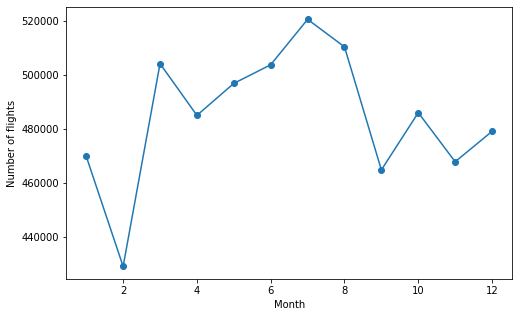

In [47]:
flights_per_month = FAA['MONTH'].value_counts(sort=False)
plt.figure(figsize=(8,5))
plt.plot(flights_per_month,'o-')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.show()

**Findings:**
- The total number of flights reaches a peak in the summer months (June to August), which makes sense because the weather is warm and kids are on vacation.
- There is also a local maximum in March, most likely associated with spring break travel.
- Surprisingly, Christmas holidays in December only account for a modest uptick in total flight numbers. 

**How many flights were there for each airline each month**

In [49]:
flights_per_airline_month = FAA.groupby('AIRLINE_NAME')['MONTH'].value_counts(sort=False)
flights_per_airline_month

AIRLINE_NAME          MONTH
Alaska Airlines Inc.  1        13257
                      2        12194
                      3        14276
                      4        13974
                      5        14682
                               ...  
Virgin America        8         5688
                      9         5154
                      10        5464
                      11        5414
                      12        5534
Name: MONTH, Length: 162, dtype: int64

Let's transform the results into a dataframe and label the column 'NUMBER_OF_FLIGHTS':

In [50]:
flights_per_airline_month = pd.DataFrame(flights_per_airline_month)
flights_per_airline_month.rename(columns={'MONTH':'NUMBER_OF_FLIGHTS'}, inplace=True)
flights_per_airline_month

NUMBER_OF_FLIGHTS
AIRLINE_NAME         MONTH                   
Alaska Airlines Inc. 1                  13257
                     2                  12194
                     3                  14276
                     4                  13974
                     5                  14682
...                                       ...
Virgin America       8                   5688
                     9                   5154
                     10                  5464
                     11                  5414
                     12                  5534

[162 rows x 1 columns]

We now want to plot the total number of flights per month for each airline:

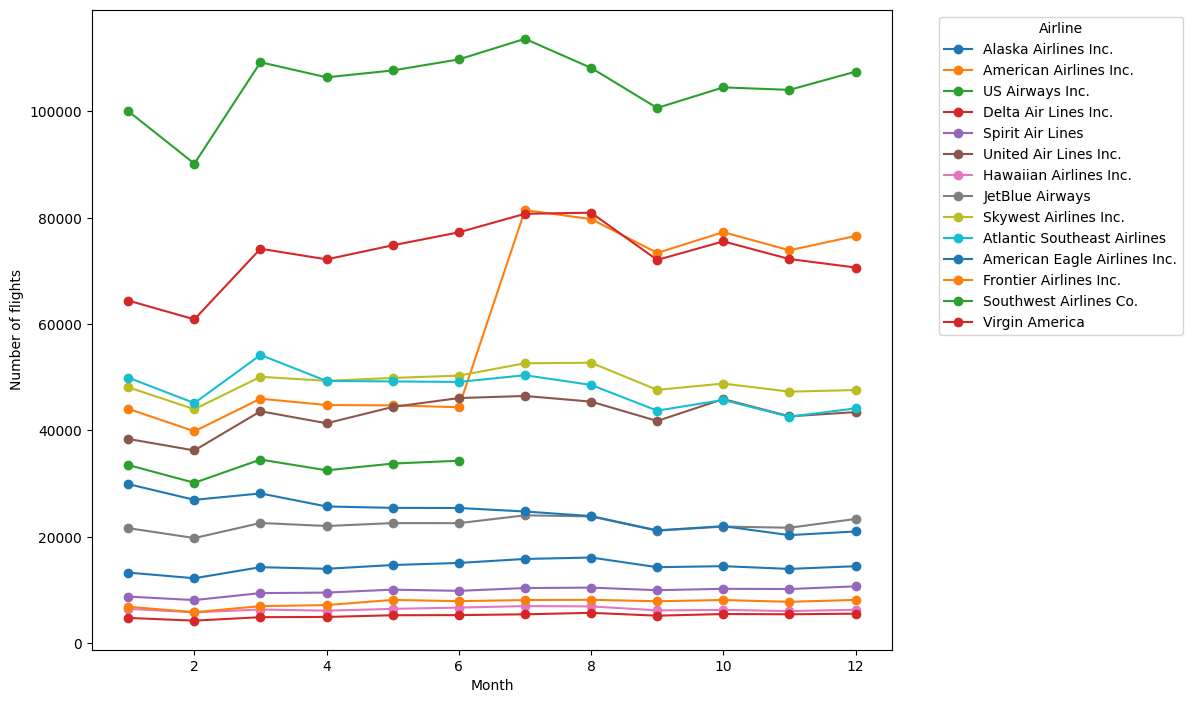

In [51]:
# Create the canvas and axes:
fig = plt.figure(figsize=(10,8), dpi = 100)
ax = fig.add_axes([0.1, 0.1, 0.8,0.8])

# Create a list of unique airline names, we'll loop over this list
# to plot a line for each airline
list_airline_names = FAA.AIRLINE_NAME.unique()

# For each airline in the list, plot the number of flights for each month:
for airline_name in list_airline_names:
    ax.plot(flights_per_airline_month.loc[airline_name], 'o-', label = airline_name)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of flights')
    ax.legend(title='Airline', bbox_to_anchor=(1.05,1), loc ='upper left')


**Findings:**
- Soutwest Airlines is the carrier with the most flights each month of the year.
- Delta Air Lines is a close second, and American Airlines are third during 2015.
- The data for US Airways (green line with number of flight values around 36K) ends in June 2015: this signals the acquisition of US Airways by American Airlines. Notice also the jump in the number of flight for American Airlines (orange line) after the month of June due to the merger of the two carriers.

Let's plot the resulting data to see how the total number of flights varies per day of the week:

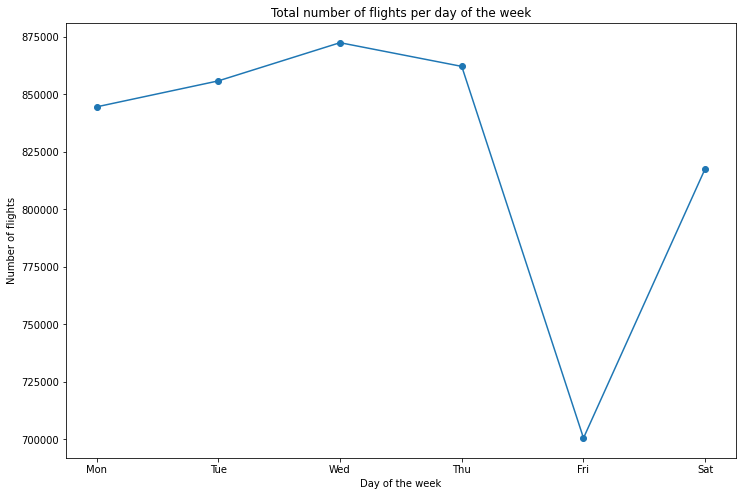

In [54]:
plt.figure(figsize=(12,8))
plt.plot(flights_per_dayofweek,'o-')
plt.xlabel('Day of the week')
plt.ylabel('Number of flights')
plt.title('Total number of flights per day of the week')
plt.show()

**Findings:**
- Wednesday is the day of the week with the most flights (no wonder it is often claimed that flights during the week are cheaper: there are more seats available to fill).
- Friday is the day of the week with the least number of flights.

Now that we have labeled every day according to its position in the year, we are ready to find the total number of flights per DAY_OF_YEAR. As usual, we do that using a the groupby() method:

In [60]:
number_of_flights_per_day = FAA.groupby('DAY_OF_YEAR')['FLIGHT_NUMBER'].count()

Let's plot the resulting data to see how the total number of flights varied each day during the whole year in 2015:

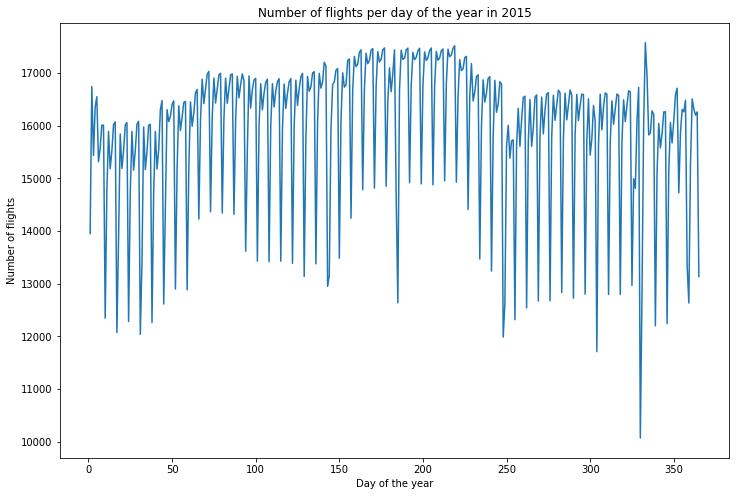

In [61]:
plt.figure(figsize=(12,8))
plt.plot(number_of_flights_per_day,'-')
plt.xlabel('Day of the year')
plt.ylabel('Number of flights')
plt.title('Number of flights per day of the year in 2015')
plt.show()

**Findings**
- There were strong weekly variations in the number of flights per day in 2015.
- These variations follow the same pattern of more or less steady number of flights during the period from Saturday to Thursday, with a strong dip on Friday (the location of the dip was inferred from the answer to question 8).
- On top of these stong weekly variations, there is a slow variation due to seasonality effects, with the number of flights per day reaching a maximum during the summer months.

Then in the resulting dataframe, select the air time column and sort values in descending order

In [63]:
groupby_Airline_name['AIR_TIME'].sort_values(ascending=False)[0:5]

AIRLINE_NAME
Southwest Airlines Co.    129920840.0
Delta Air Lines Inc.      101187629.0
American Airlines Inc.    100899345.0
United Air Lines Inc.      84445733.0
Skywest Airlines Inc.      44723535.0
Name: AIR_TIME, dtype: float64

**Findings:**

Although the total number of flights with departure delay greater than air time is very big at 212,461, it's still a small percentage of the total number of flights at 3.65%.

Let's transform the series into a dataframe:

In [69]:
Dep_delay_to_airtime = pd.DataFrame(Dep_delay_to_airtime, columns=['Departure-delay-to-airtime'])
Dep_delay_to_airtime.head()

,Departure-delay-to-airtime
165,4.437500
344,2.250000
369,1.224299
465,2.092308
484,12.133333


Now we want to merge this dataframe to the dep_delay dataframe from the pervious question:

In [70]:
df = pd.merge(dep_delay, Dep_delay_to_airtime, how='left', left_index=True, right_index=True)
df.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DAY_NAME,DAY_OF_YEAR,Departure-delay-to-airtime
165,2015,1,1,4,EV,5976,N27200,BUF,EWR,555,928.0,213.0,38.0,1006.0,80.0,93.0,48.0,282,1054.0,7.0,715,1101.0,226.0,0,0,13.0,0.0,0.0,0.0,213.0,Atlantic Southeast Airlines,Buffalo Niagara International Airport,Buffalo,NY,USA,42.94052,-78.73217,Newark Liberty International Airport,Newark,NJ,USA,40.6925,-74.16866,Wed,1,4.4375


Let's only keep a few columns of interest:

In [71]:
df = df.loc[:,['MONTH','DAY','AIRLINE_NAME','FLIGHT_NUMBER', 'DEPARTURE_DELAY', 'AIR_TIME', 'Departure-delay-to-airtime']]

Let's sort the values in descending order by the ratio of departure delay to airtime and print the top 5 rows:

In [72]:
df.sort_values(by='Departure-delay-to-airtime', ascending=False)[0:5]

,MONTH,DAY,AIRLINE_NAME,FLIGHT_NUMBER,DEPARTURE_DELAY,AIR_TIME,Departure-delay-to-airtime
5624697,12,19,Skywest Airlines Inc.,4858,1233.0,24.0,51.375000
3905795,8,31,Skywest Airlines Inc.,4995,907.0,19.0,47.736842
2230607,5,22,Atlantic Southeast Airlines,2733,700.0,16.0,43.750000
3561972,8,10,Skywest Airlines Inc.,6257,798.0,19.0,42.000000
5253078,11,25,Skywest Airlines Inc.,5485,629.0,15.0,41.933333


# Heat maps

Before we wrap up our analysis, let us draw some heat maps of the number of flights by day of the week and month. 

In [76]:
dayMonth = FAA.groupby(by=['MONTH','DAY_NAME']).count()['FLIGHT_NUMBER'].unstack()
dayMonth = dayMonth.loc[:,['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
dayMonth

DAY_NAME,Mon,Tue,Wed,Thu,Fri,Sat,Sun
MONTH,,,,,,,
1,60837,62141,78022,80955,64165,59681,64167
2,62323,63374,65156,65429,50649,57717,64543
3,81783,66325,67525,67689,57245,79675,84070
4,65309,83345,84333,67517,53879,63444,67324
5,66529,67087,68180,85125,66322,77047,66703
6,84879,68433,69498,69642,58683,66570,86192
7,68987,86135,87142,84523,57316,66985,69630
8,67266,67675,68587,68725,70989,81679,85615
9,79315,80151,65617,65658,49508,59725,64972


<AxesSubplot:xlabel='DAY_NAME', ylabel='MONTH'>

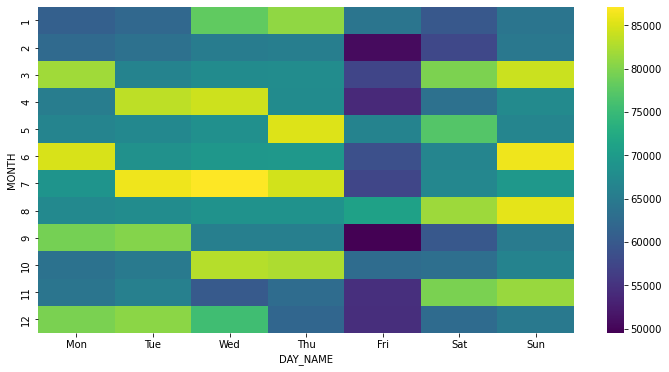

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

Let's draw a similar heatmap for the number of flights per hour and per day of the week. First, let's examine the data in the departure time column in the FAA dataframe:

In [78]:
FAA.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5819079, dtype: float64

It looks like the time is encoded as follows:
- If the departure time has four digits, like 2354, it should be understood as 23:54, and the hour is the first two digits
- If the departure time has two digits, like 18, it should be be understood as 18:00, and the listed time is the departure hour
- If the departure time has one digit, like 2, it should be understood as 2:00, and the listed time is the departure hour
- There are a number of cases where the departure time is between 24 and 59 inclusive. For all these cases we shall take the departure hour to be 0.

Based on this, let us create a custom function to calculate the departure hour from the DEPARTURE_TIME column.

In [79]:
def departure_hour(d):                
    if d >= 100:
        return int(d//100)
    elif int(d) > 24 and int(d) <= 59:
        return 0
    elif int(d) == 24:
        return 0
    else:
        return int(d)

We now apply this custom function to the DEPARTURE_TIME column of the FAA dataframe, and cast the result into a dataframe:

In [80]:
hours = FAA.DEPARTURE_TIME.apply(departure_hour)
hours = pd.DataFrame(hours).rename(columns={'DEPARTURE_TIME':'DEP_HOUR'})
hours.head()

,DEP_HOUR
0,23
1,2
2,18
3,15
4,0


We now are going to merge this dataframe with the FAA dataframe based on indices:

In [81]:
FAA = pd.merge(FAA, hours, how='left', left_index=True, right_index=True)
FAA.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DAY_NAME,DAY_OF_YEAR,DEP_HOUR
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2.0,0.0,2.0,3.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Wed,1,23


We notice that there are a number of rows that still show the DEP_HOUR as 24:

In [82]:
FAA[FAA.DEP_HOUR==24]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DAY_NAME,DAY_OF_YEAR,DEP_HOUR
30657,2015,1,2,5,B6,333,N529JB,MCO,SJU,2355,2400.0,5.0,17.0,17.0,161.0,161.0,140.0,1189,337.0,4.0,336,341.0,5.0,0,0,2.0,0.0,2.0,3.0,0.0,JetBlue Airways,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183,Thu,2,24
30682,2015,1,2,5,B6,745,N556JB,JFK,PSE,2359,2400.0,1.0,21.0,21.0,227.0,219.0,187.0,1617,428.0,11.0,446,439.0,-7.0,0,0,2.0,0.0,2.0,3.0,0.0,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,Mercedita Airport,Ponce,PR,USA,18.00830,-66.56301,Thu,2,24
42698,2015,1,3,6,EV,4629,N21130,RIC,IAH,1759,2400.0,361.0,10.0,10.0,206.0,216.0,201.0,1157,231.0,5.0,2025,236.0,371.0,0,0,10.0,0.0,361.0,0.0,0.0,Atlantic Southeast Airlines,Richmond International Airport,Richmond,VA,USA,37.50517,-77.31967,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972,Fri,3,24
60538,2015,1,4,7,EV,4513,N14993,CLE,ORD,1950,2400.0,250.0,11.0,11.0,92.0,87.0,66.0,315,17.0,10.0,2022,27.0,245.0,0,0,0.0,0.0,0.0,0.0,245.0,Atlantic Southeast Airlines,Cleveland Hopkins International Airport,Cleveland,OH,USA,41.41089,-81.84940,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,Sat,4,24
62119,2015,1,4,7,OO,5642,N975SW,DEN,GJT,2205,2400.0,115.0,11.0,11.0,59.0,57.0,40.0,212,51.0,6.0,2304,57.0,113.0,0,0,0.0,0.0,113.0,0.0,0.0,Skywest Airlines Inc.,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,Grand Junction Regional Airport (Walker Field),Grand Junction,CO,USA,39.12241,-108.52673,Sat,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785327,2015,12,29,2,B6,1685,N187JB,BOS,PIT,1725,2400.0,395.0,14.0,14.0,112.0,106.0,87.0,496,141.0,5.0,1917,146.0,389.0,0,0,0.0,0.0,23.0,366.0,0.0,JetBlue Airways,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518,Pittsburgh International Airport,Pittsburgh,PA,USA,40.49147,-80.23287,Mon,363,24
5789622,2015,12,29,2,AA,217,N3DYAA,LAS,MIA,2347,2400.0,13.0,16.0,16.0,267.0,255.0,234.0,2174,710.0,5.0,714,715.0,1.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,Mon,363,24
5789623,2015,12,29,2,AA,1927,N768US,LAX,IAD,2349,2400.0,11.0,29.0,29.0,289.0,276.0,241.0,2288,730.0,6.0,738,736.0,-2.0,0,0,2.0,0.0,2.0,3.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Washington Dulles International Airport,Chantilly,VA,USA,38.94453,-77.45581,Mon,363,24
5819014,2015,12,31,4,NK,806,N533NK,LAS,ATL,2335,2400.0,25.0,16.0,16.0,230.0,209.0,186.0,1747,622.0,7.0,625,629.0,4.0,0,0,2.0,0.0,2.0,3.0,0.0,Spirit Air Lines,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Wed,365,24


Let's replace 24 in DEP_HOUR column with 0:

In [83]:
FAA['DEP_HOUR'] = FAA['DEP_HOUR'].replace(24,0)
FAA[FAA.DEP_HOUR==24]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DAY_NAME,DAY_OF_YEAR,DEP_HOUR


We now prepare our data for the heatmap plot:

In [84]:
dayHour = FAA.groupby(by=['DEP_HOUR','DAY_NAME']).count()['FLIGHT_NUMBER'].unstack()
dayHour = dayHour.loc[:,['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
dayHour.head()

DAY_NAME,Mon,Tue,Wed,Thu,Fri,Sat,Sun
DEP_HOUR,,,,,,,
0,2063,1978,2362,2350,2023,2098,2426
1,1321,1153,1403,1469,1249,1408,1501
2,434,312,419,445,443,482,459
3,242,198,226,231,223,259,266
4,1553,1603,1666,1545,1471,1241,1627


Draw the heatmap:

<AxesSubplot:xlabel='DAY_NAME', ylabel='DEP_HOUR'>

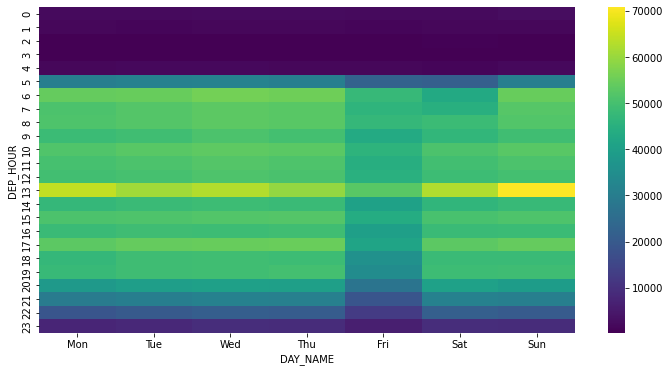

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap = 'viridis')

**Findings:**
- The quietest hours in terms of number of flights are the hours beween 10PM and 4AM. 
- The busiest time in terms of number of flights is around 1PM.

# Conclusion

In the course of this project, we were able to use Numpy and Pandas libraries to analyze flight data and gain a better understanding of its various features. It is a pleasant surprise to see that the Python libraries used were able to handle a large amount of data (more than 5 million rows and about 40 features) quite efficiently. It would be nice to do a similar kind of analysis using mySQL or a big data engine like Apache Hive or Impala and compare their performance to the performance of the Numpy and Pandas libraries. This will be the topic of a future contribution.